In [1]:
!pip install numpy pandas matplotlib seaborn xgboost scikit-learn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("water_potability.csv")

# Business Understanding
- Classifying water quality 
- Classification
- 3275 data
- Data quality not good

1. pH value:

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Data Understanding

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot: >

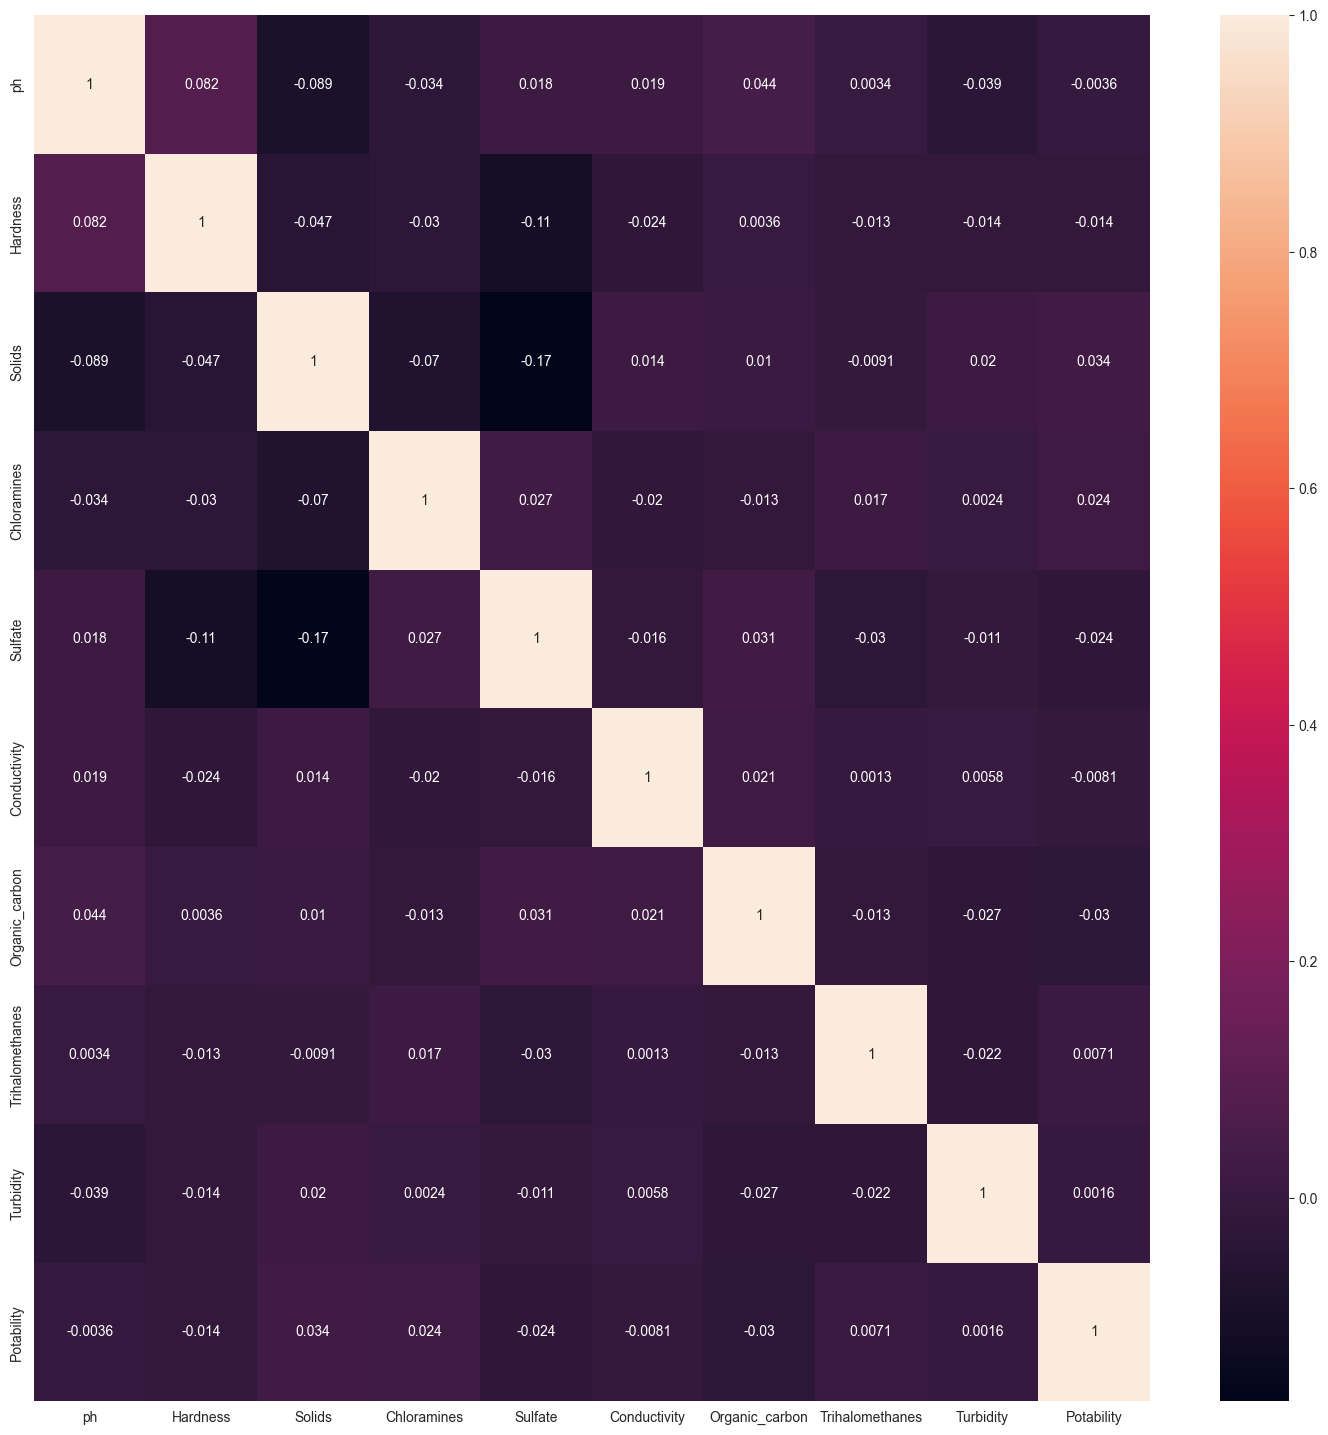

In [9]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), ax = ax, annot = True)

<AxesSubplot: >

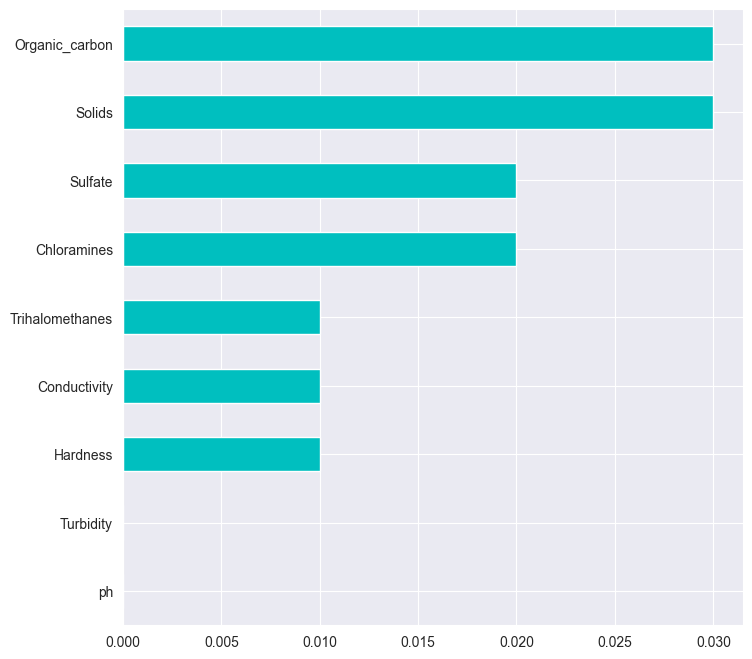

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

In [11]:
data[data['Potability'] == 0][['ph', 'Sulfate', 'Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [12]:
data['ph']= data['ph'].fillna(data['ph'].mean())
data['Sulfate']= data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes']= data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())
data = data.dropna()

In [13]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
data.shape

(3276, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<AxesSubplot: >

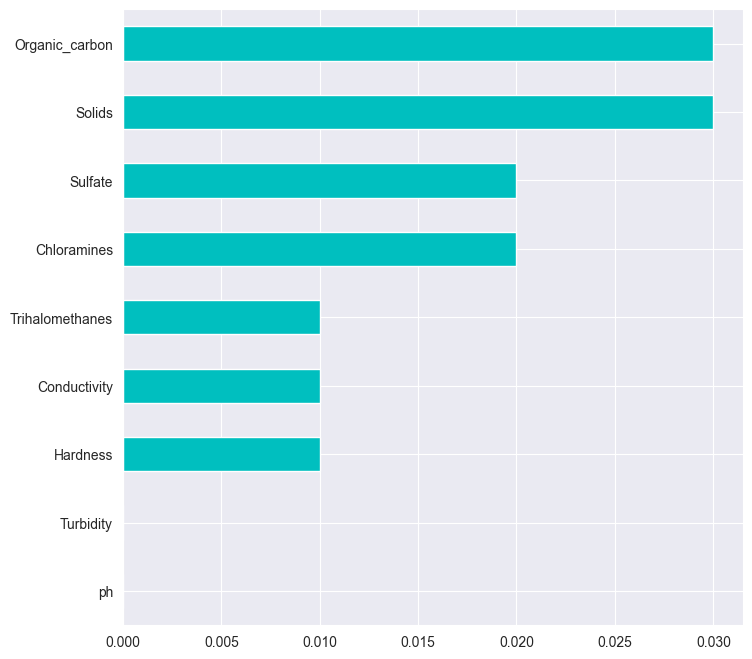

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

<AxesSubplot: >

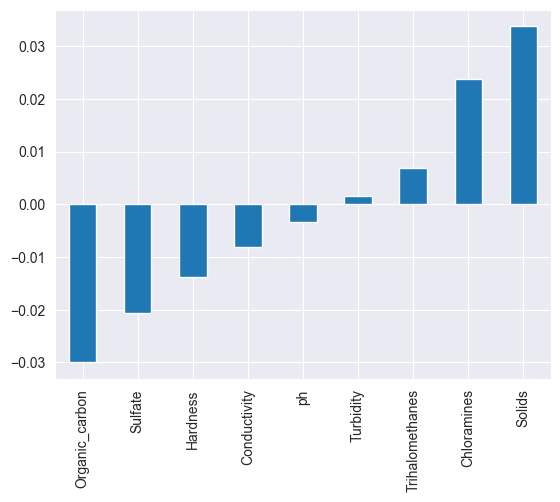

In [17]:
data.corr()['Potability'][:-1].sort_values().plot(kind='bar')

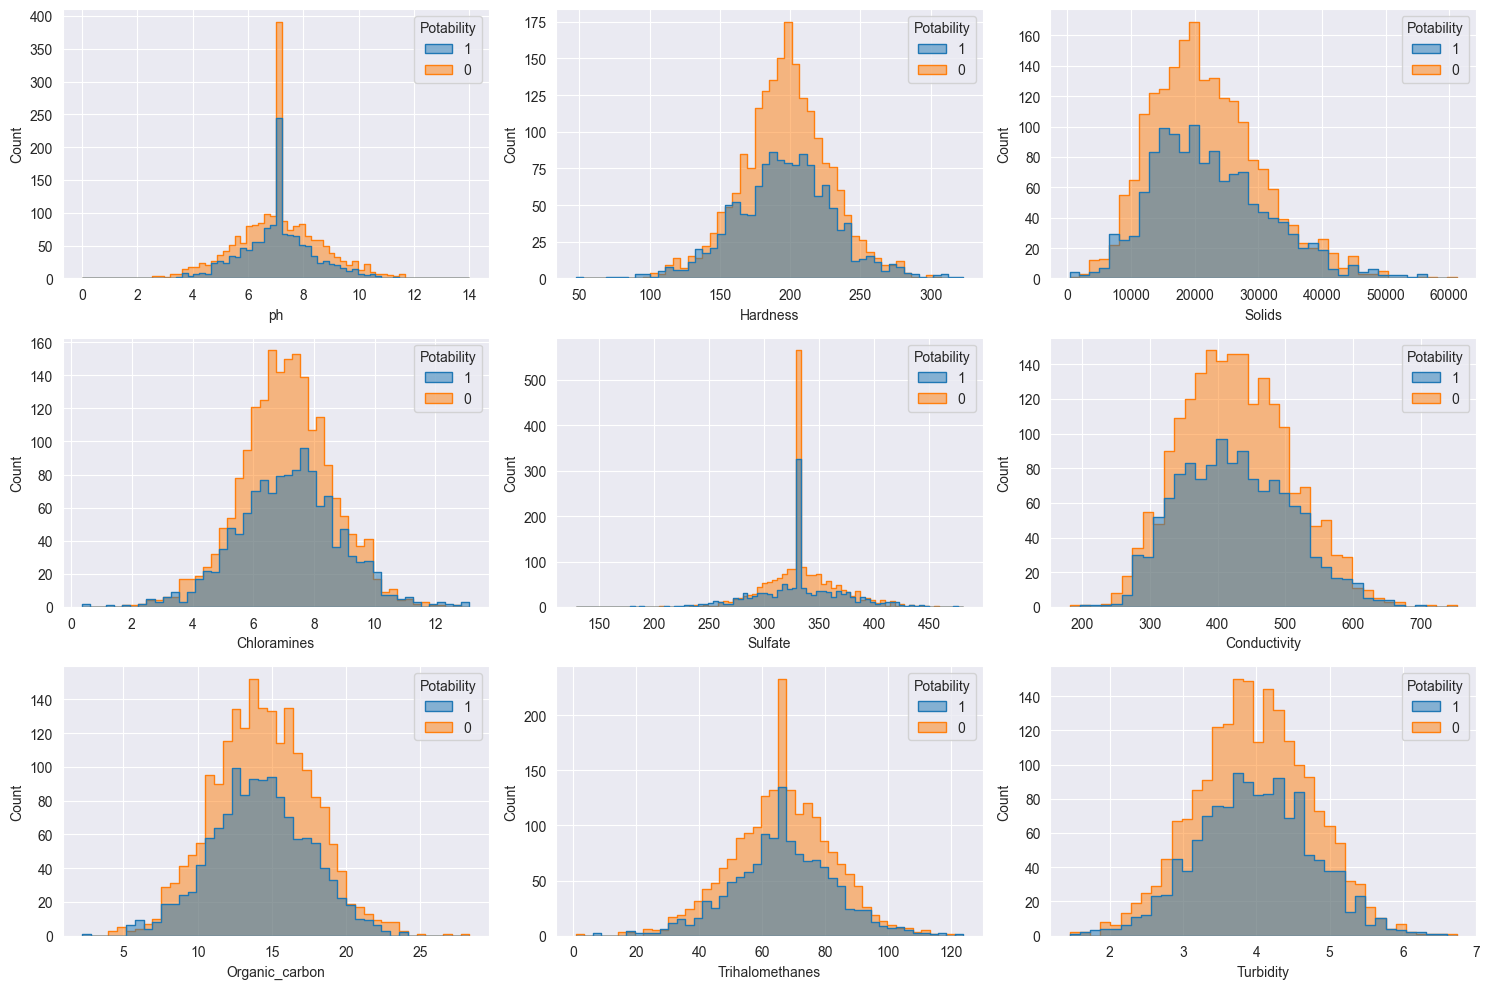

In [18]:
plt.figure(figsize = (15,10), tight_layout = True)
for i, feature in enumerate(data.columns):
    if feature != 'Potability':
        plt.subplot(3,3,i+1)
        sns.histplot(data = data, x = feature, hue = 'Potability', alpha = 0.5, element = 'step', hue_order = [1,0])

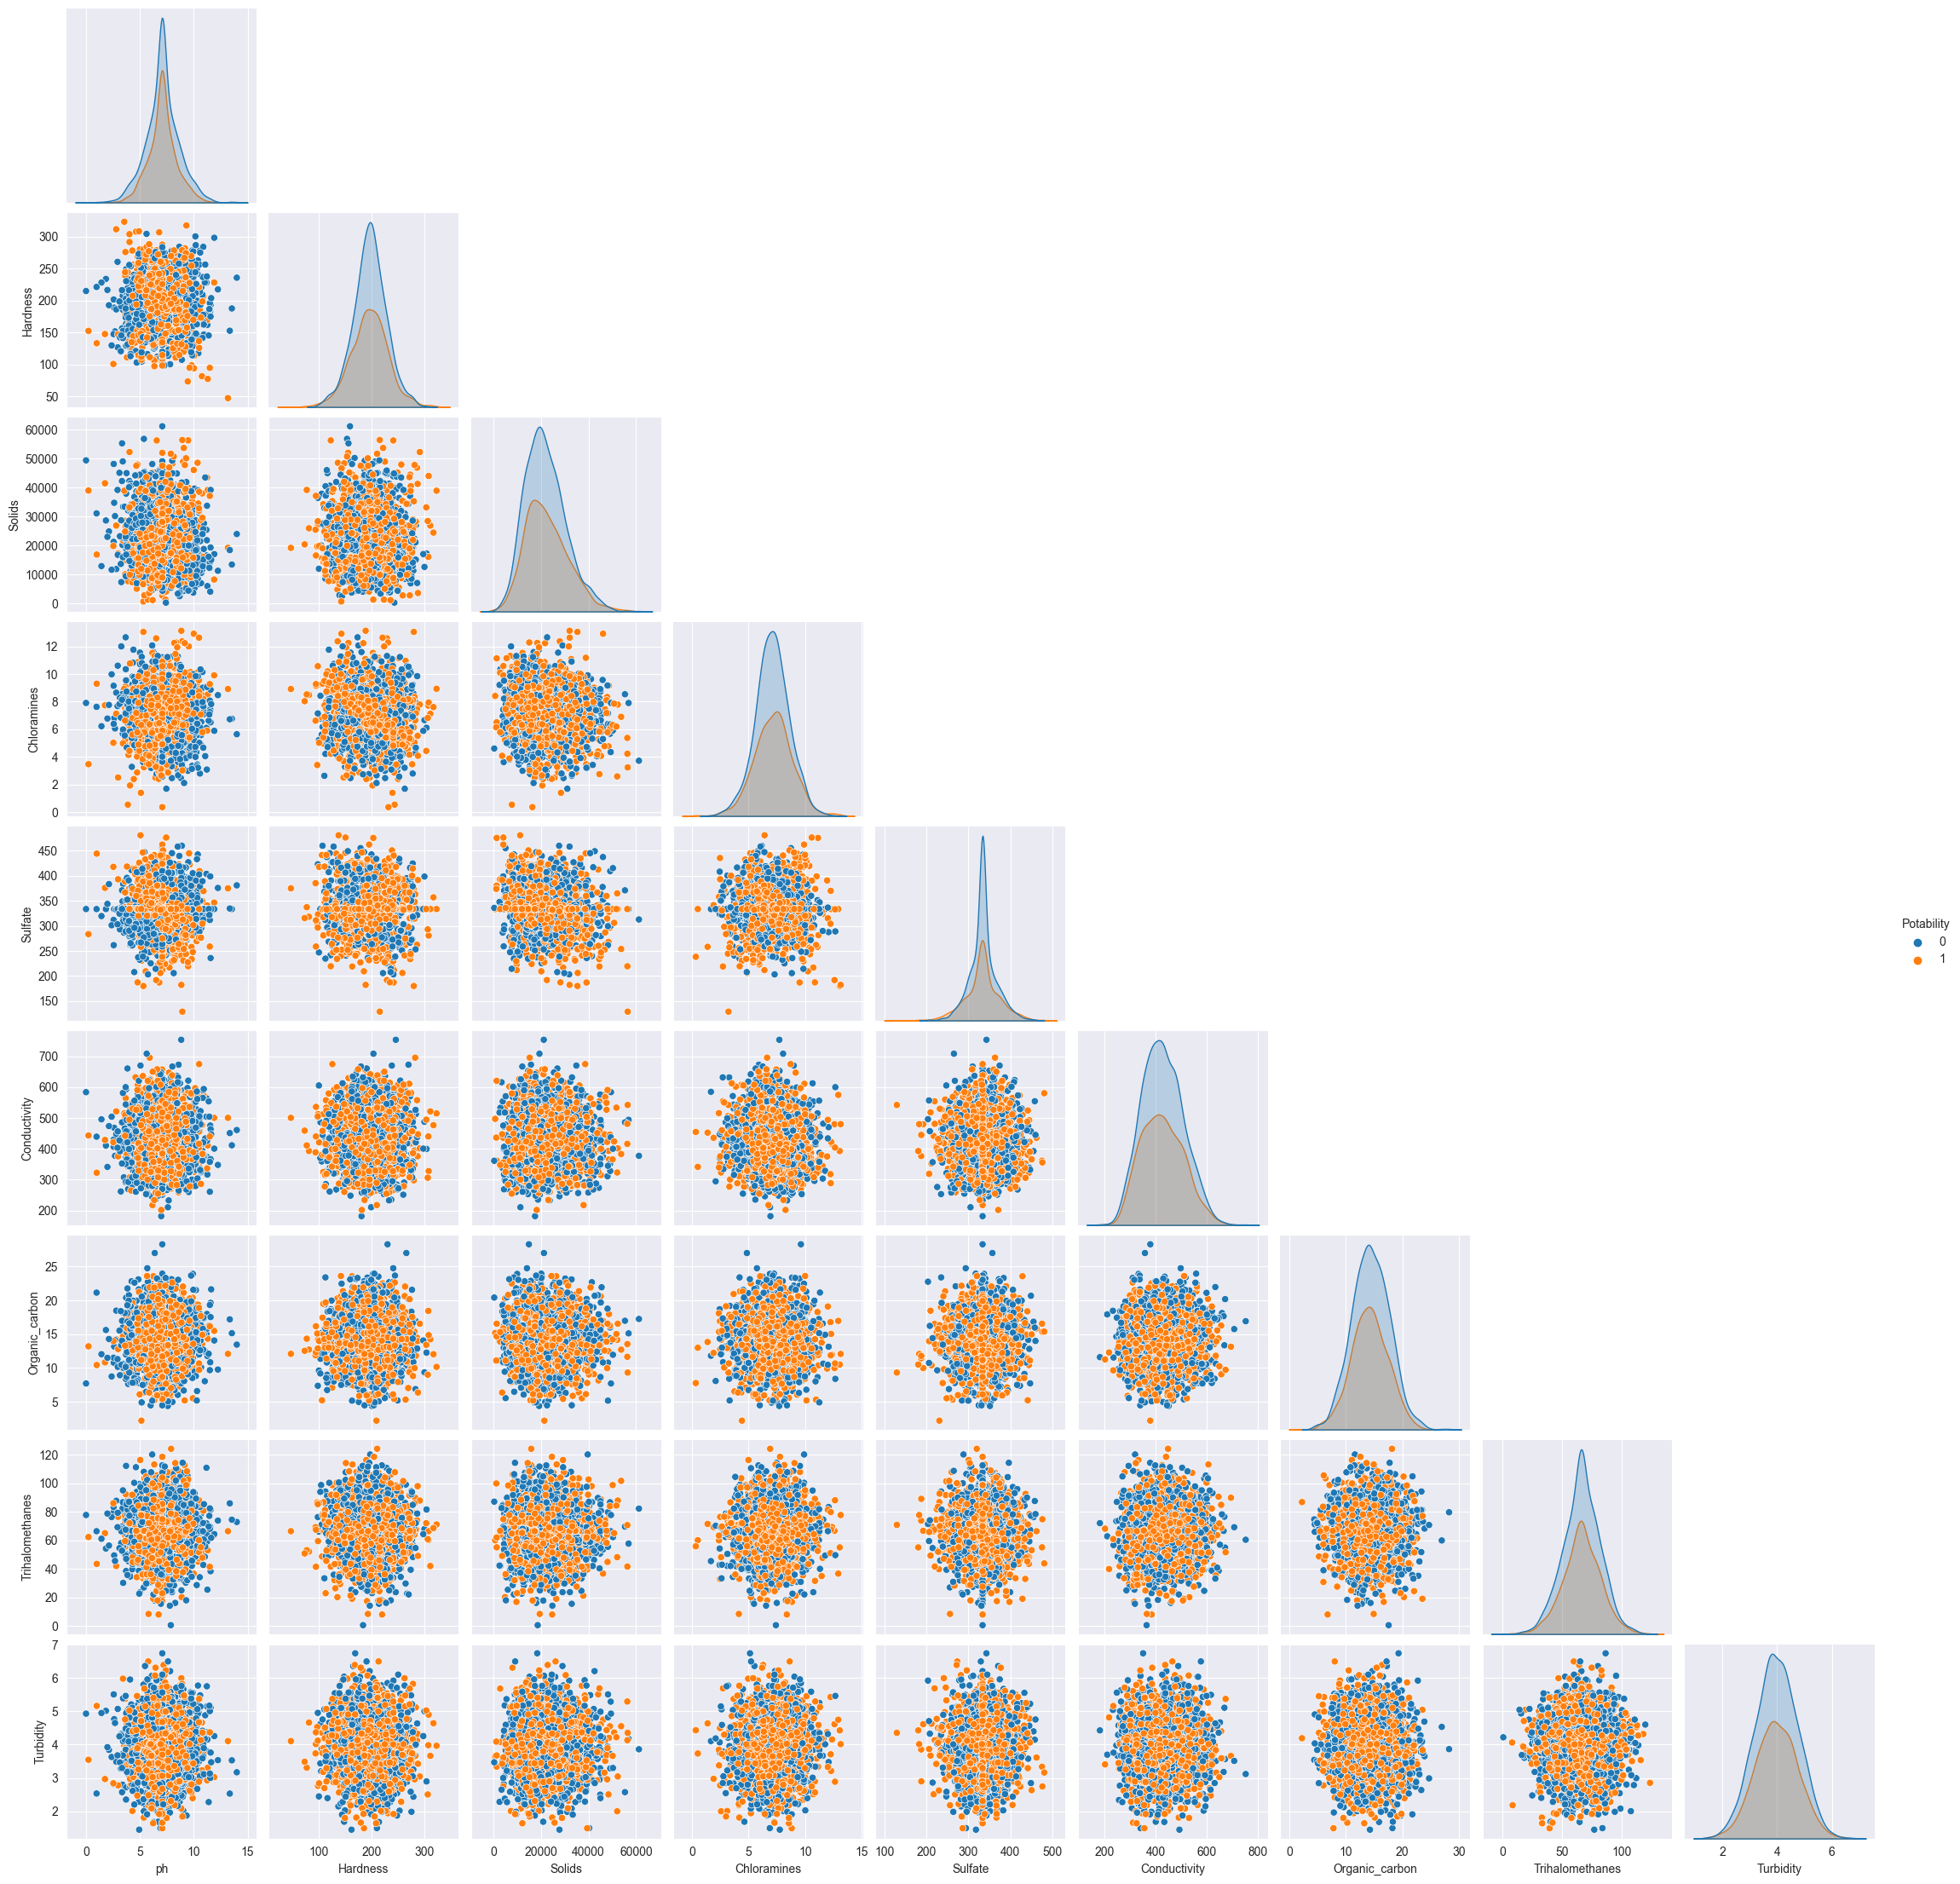

In [19]:
sns.pairplot(data = data, hue = 'Potability', corner = True)

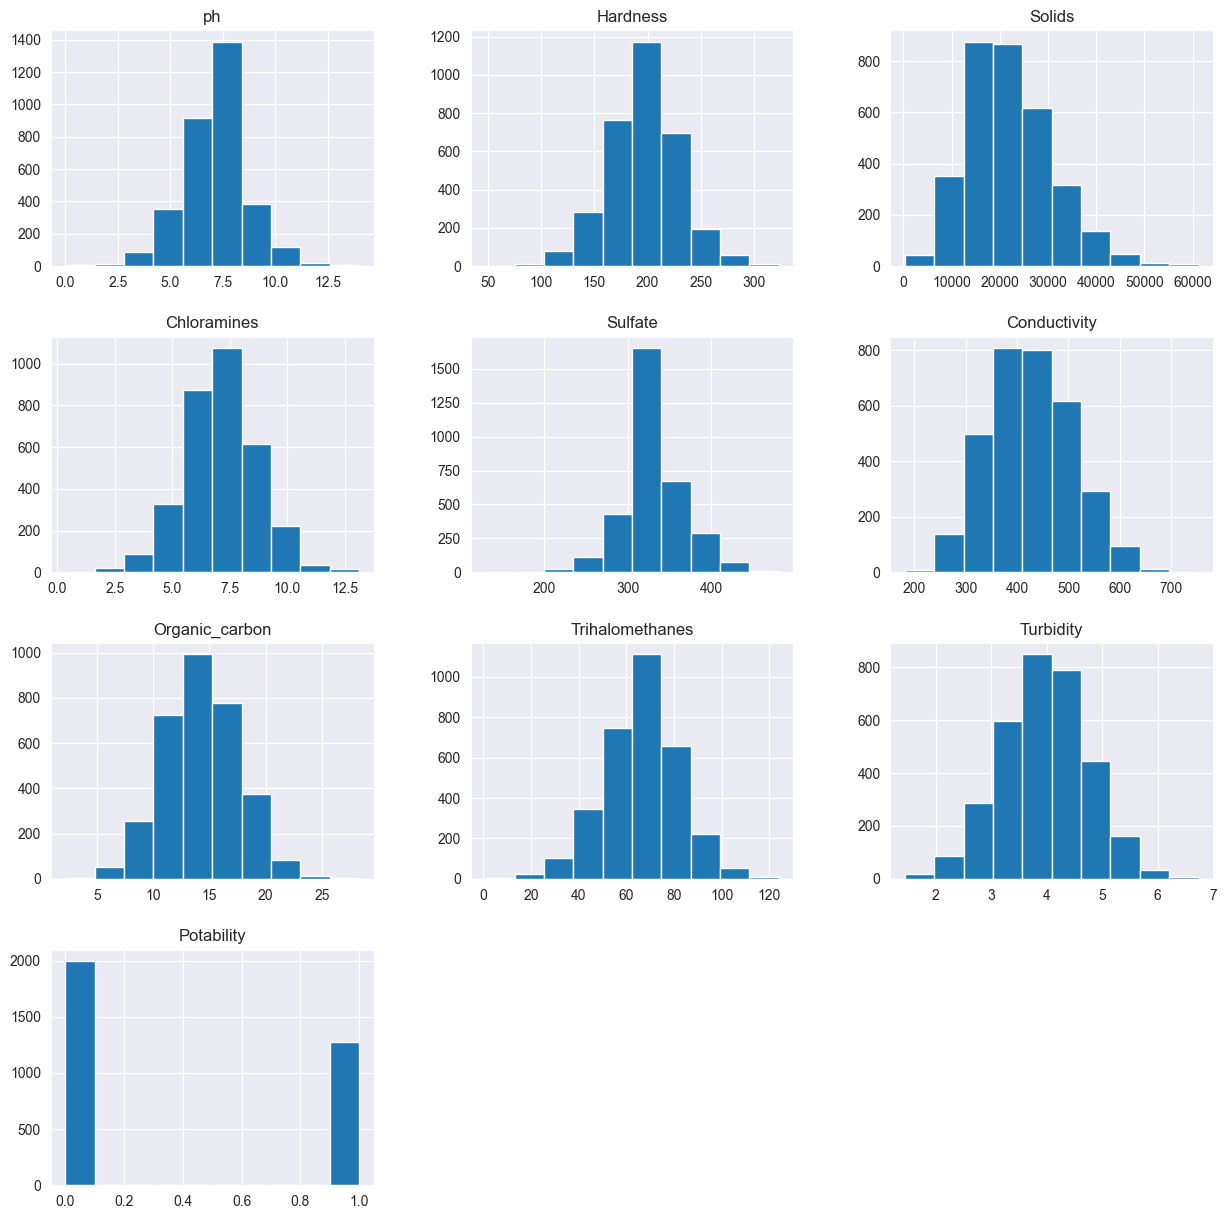

In [20]:
data.hist(figsize=(15,15))
plt.show()

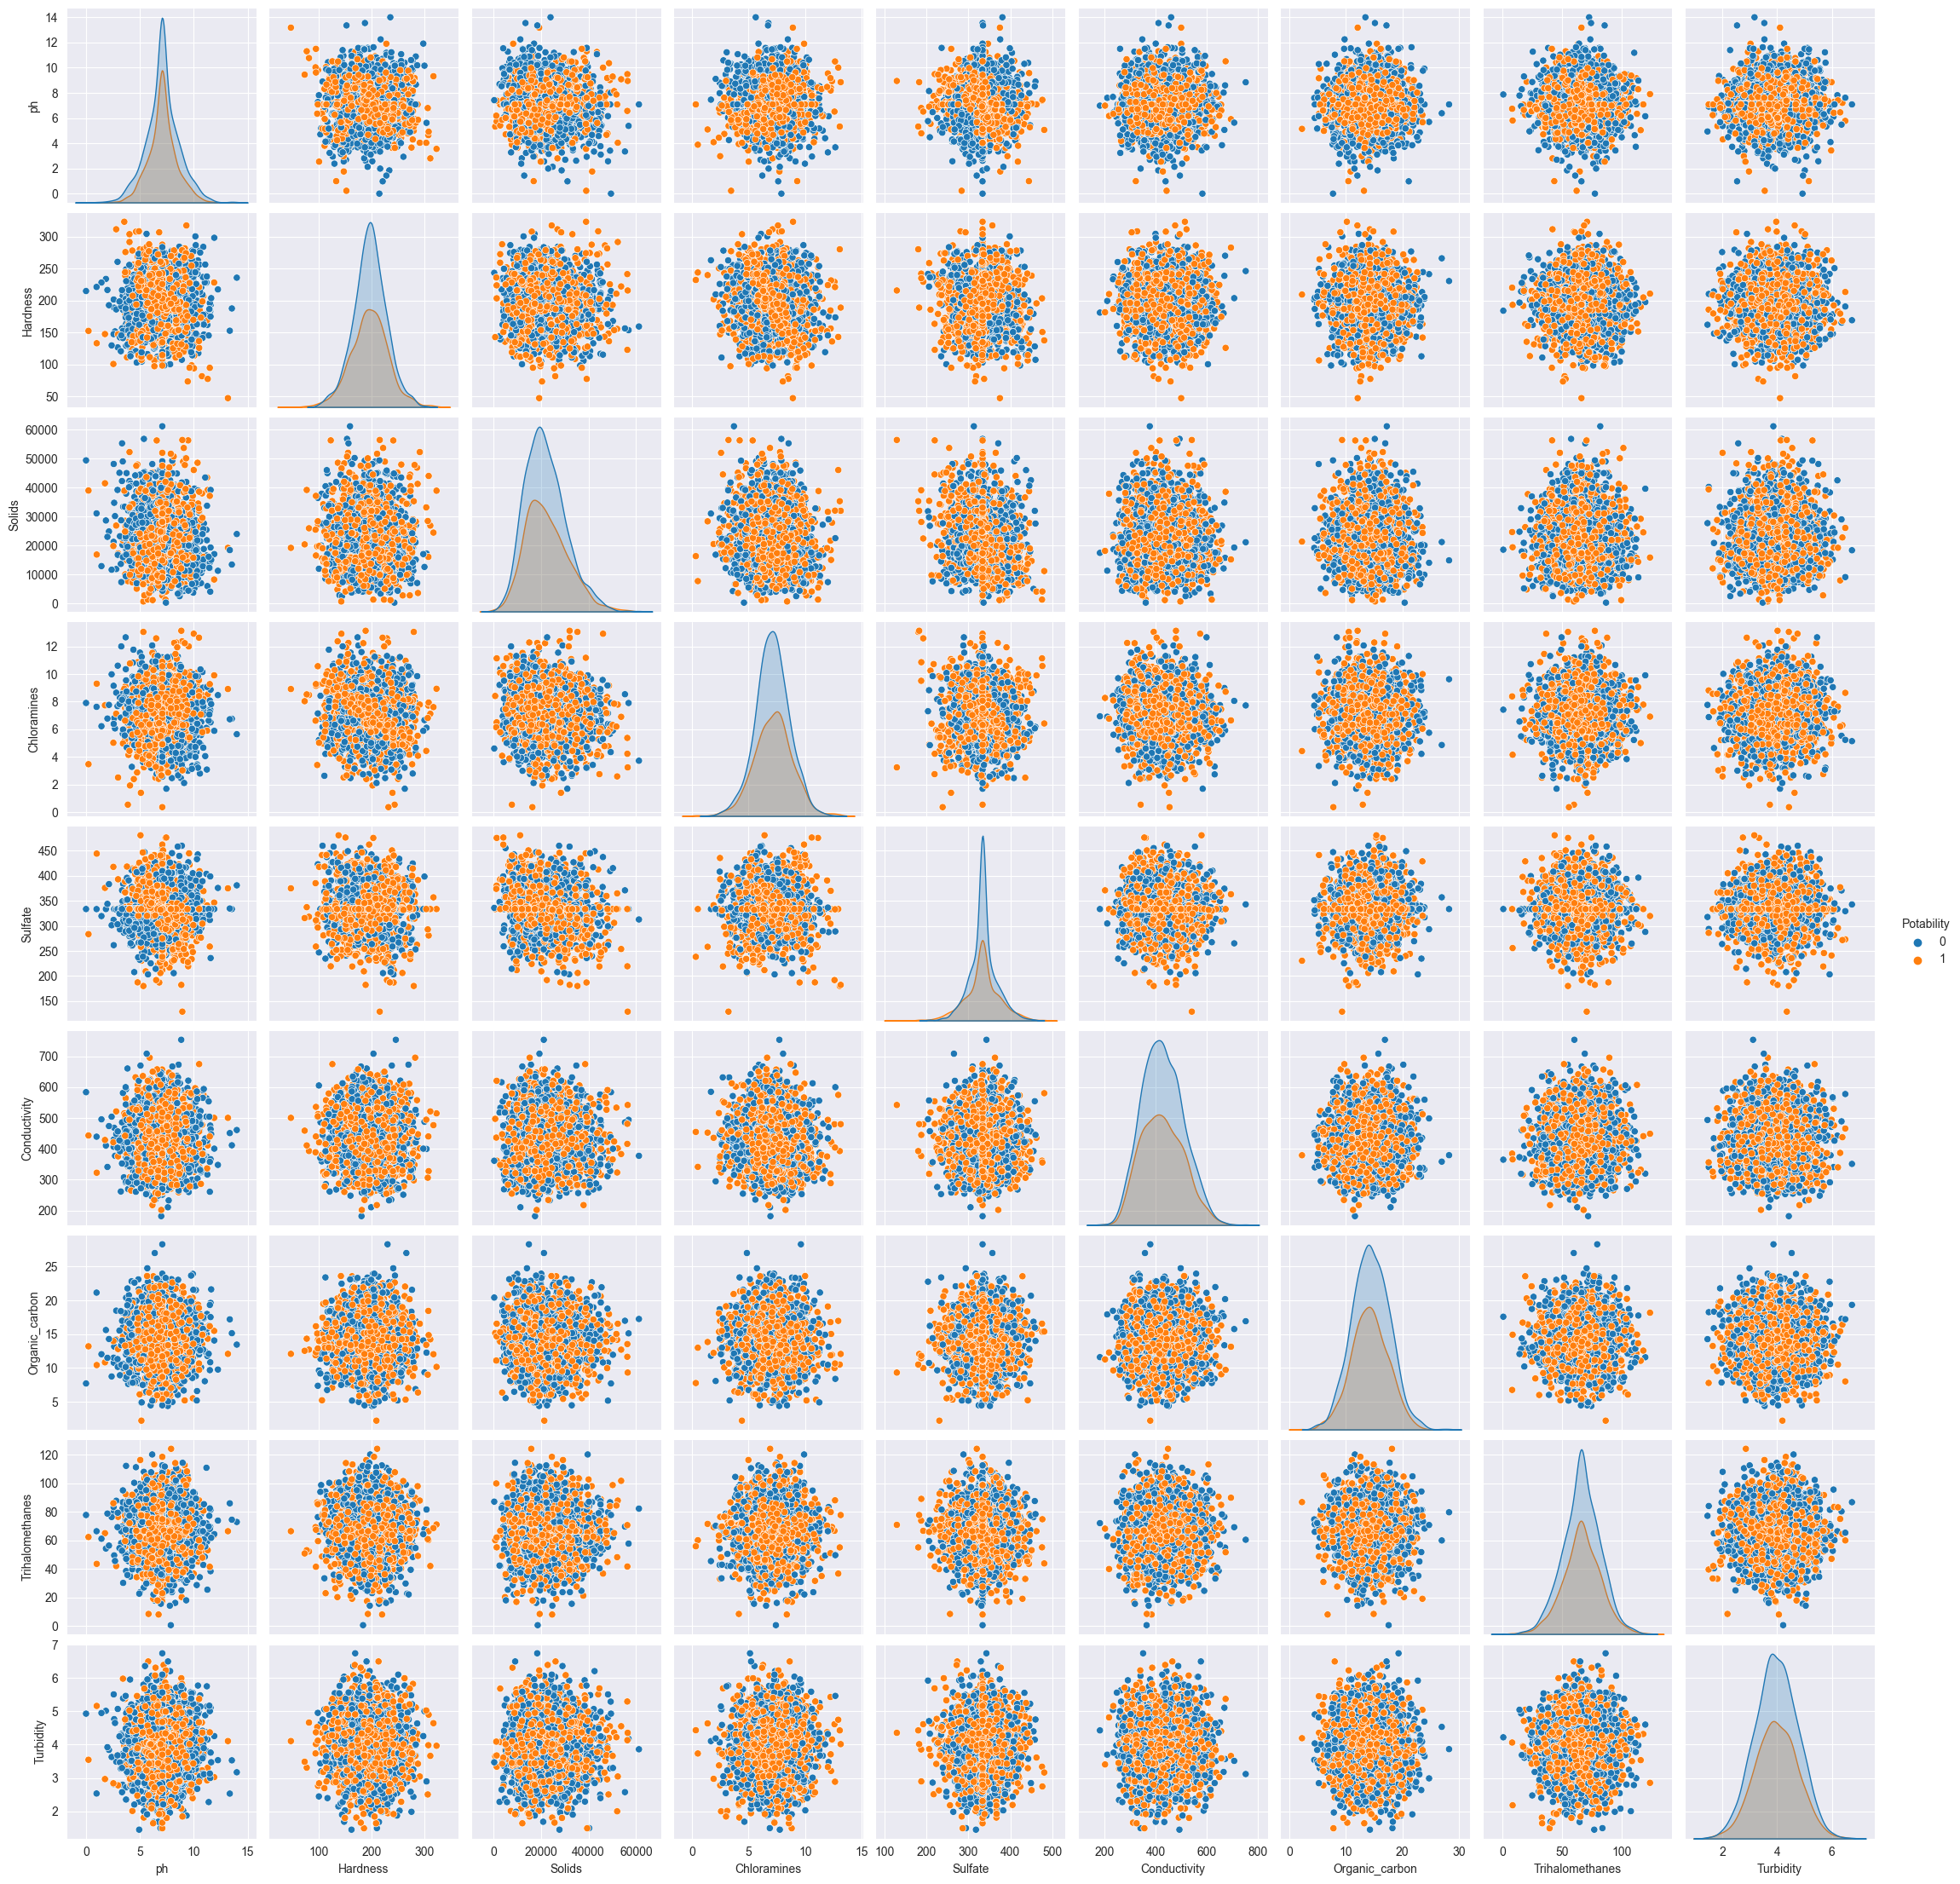

In [21]:
sns.pairplot(data, hue='Potability')

<AxesSubplot: >

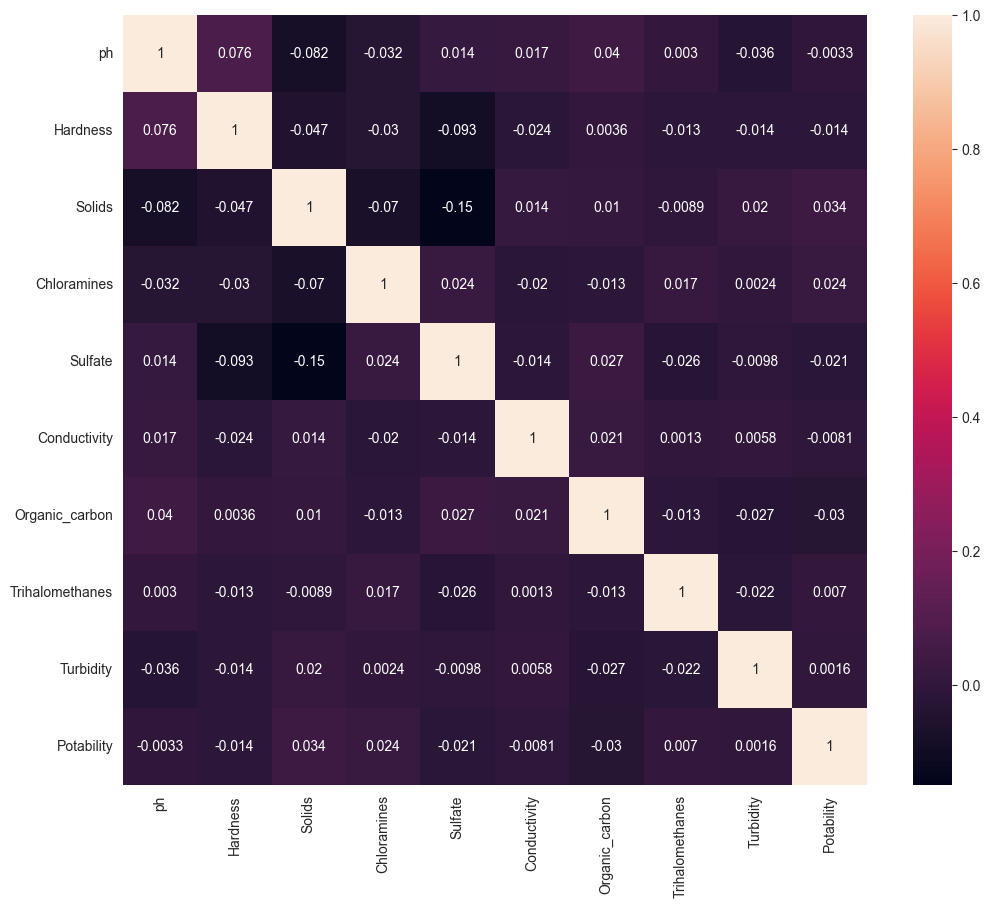

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

# Data Preparation

In [23]:
from sklearn.utils import shuffle

data = shuffle(data)
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
2611  5.517737  190.669928  17638.322473    10.525858  333.775777   
2291  6.095512  200.045818  16404.941420     6.392095  366.017336   
1648  7.080795  213.652293  28266.755107     3.632114  333.775777   
721   3.633163  179.350577  28584.175810     5.246382  292.440536   
2234  7.345138  202.174463  17032.773734     6.212629  361.440487   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2611    461.928981       12.531684        44.887843   4.523106           0  
2291    444.454211       16.029989        72.301702   4.302016           0  
1648    483.797968       15.741911        78.810852   4.312290           0  
721     500.866018        8.956401        77.360985   3.349572           1  
2234    600.295028       17.299740        89.077865   4.297995           0

In [24]:
import sklearn
sklearn.__version__

'1.0.2'

In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('Potability', axis = 1) 
y = data['Potability'] 

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [27]:
X = pd.DataFrame(X, columns = [col for col in data.columns if col!='Potability'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40) 

# Modeling

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [30]:
key = ['KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC']
value = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), SVC()]

In [31]:
models = dict(zip(key, value))

training_scores = []
testing_scores = []

for key, value in models.items():
    value.fit(X_train, y_train)
    train_score = value.score(X_train, y_train)
    test_score = value.score(X_test, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)

    print(f"{key}\n")
    print(f"Training Score: {train_score}" )
    print(f"Testing Score: {test_score} \n")

KNeighborsClassifier

Training Score: 0.7562145660706499
Testing Score: 0.6083418107833164 

LogisticRegression

Training Score: 0.6162232882686437
Testing Score: 0.595116988809766 

RandomForestClassifier

Training Score: 1.0
Testing Score: 0.6581892166836215 

GaussianNB

Training Score: 0.6367204535542956
Testing Score: 0.6103763987792472 

DecisionTreeClassifier

Training Score: 1.0
Testing Score: 0.5849440488301119 

XGBClassifier

Training Score: 0.9982555604012211
Testing Score: 0.6520854526958291 

SVC

Training Score: 0.7269952027911034
Testing Score: 0.6642929806714141 



In [32]:
from sklearn.model_selection import cross_val_score
cv_scores = []

for key, value in models.items():
    cvs = cross_val_score(value, X, y, cv=5)
    cv_scores.append(cvs.mean())
    print(f"{key}\n")
    print(f"CV Score: {cvs.mean()} \n" )

KNeighborsClassifier

CV Score: 0.6126387078756285 

LogisticRegression

CV Score: 0.6105008378328058 

RandomForestClassifier

CV Score: 0.6688009681623535 

GaussianNB

CV Score: 0.6257596350772668 

DecisionTreeClassifier

CV Score: 0.5817994786818097 

XGBClassifier

CV Score: 0.6330841556507169 

SVC

CV Score: 0.6752117855148017 



In [33]:
random_states = []

svc = SVC()
rfc = RandomForestClassifier()

svc_acc = []
rfc_acc = []

for i in range(1, 150, 1):
    xtrain, xtest, ytrain, ytest, = train_test_split(X, y, random_state=i, test_size=0.2, stratify=y)
    svc.fit(xtrain, ytrain)
    rfc.fit(xtrain, ytrain)
    svc_acc.append(svc.score(xtest, ytest))
    rfc_acc.append(svc.score(xtest, ytest))
    random_states.append(i)

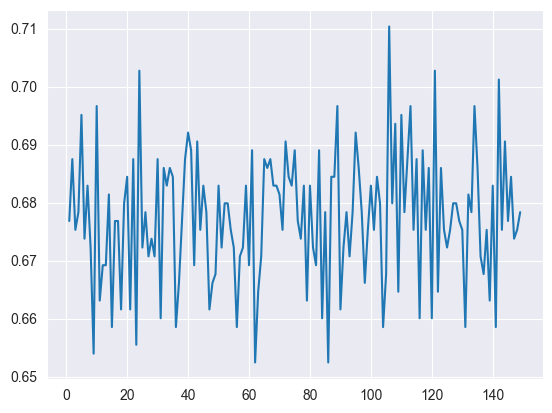

In [34]:
plt.plot(random_states, svc_acc)

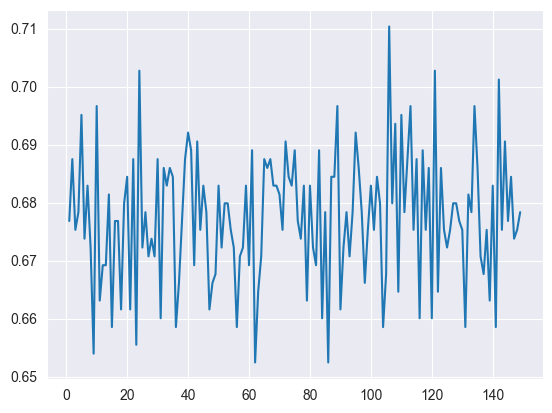

In [35]:
plt.plot(random_states, rfc_acc)

In [36]:
svc_acc.index(max(svc_acc))

105

In [37]:
m = rfc_acc.index(max(rfc_acc))
r = random_states[m]

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=r, stratify=y, test_size=0.2)

rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.7103658536585366

In [39]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=r)

params = {'n_estimators' :[10, 100, 200, 500], 
         'max_depth' :[5, 10, 20, 80],
         'min_samples_leaf' :[1, 10, 25]}

models = RandomizedSearchCV(rfc, param_distributions=params,cv=5, random_state=r)

models.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=106),
                   param_distributions={'max_depth': [5, 10, 20, 80],
                                        'min_samples_leaf': [1, 10, 25],
                                        'n_estimators': [10, 100, 200, 500]},
                   random_state=106)

In [40]:
best_model = models.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.6722560975609756

# Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       400
           1       0.75      0.24      0.36       256

    accuracy                           0.67       656
   macro avg       0.71      0.59      0.57       656
weighted avg       0.70      0.67      0.62       656

[[380  20]
 [195  61]]


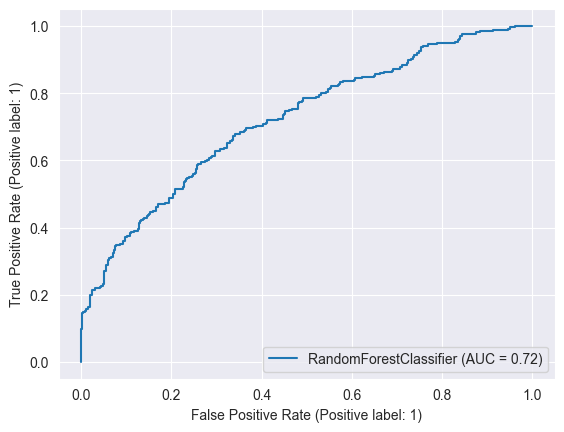

In [42]:
plot_roc_curve(best_model, X_test, y_test)

In [43]:
X_test

ph  Hardness    Solids  Chloramines       Sulfate  \
2310 -7.183987e-02 -0.637220  1.561161    -1.028543 -1.209919e+00   
3001 -6.043133e-16 -0.162958 -1.412897    -0.595700  5.335269e-01   
671   9.789846e-01 -0.163485 -0.848059    -0.328259  1.572994e-15   
1439 -1.368957e+00  0.466011  0.087516    -1.132237 -4.613507e-01   
1316  8.791508e-01 -0.829891 -0.843065     0.268951  1.572994e-15   
...            ...       ...       ...          ...           ...   
856   1.142177e+00  0.716413  1.294687    -0.906726 -2.694536e-01   
2923 -6.043133e-16 -1.029873  0.299835     0.091794 -7.943102e-02   
1364 -5.441921e-01  0.266272  0.451535     0.818539  1.380733e+00   
305  -5.831791e-01  1.268899  0.046697     1.399063  1.572994e-15   
200   5.542602e-03  0.304021 -0.932379     0.610272 -3.453414e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2310     -0.311172       -1.209221         0.001540   1.652900  
3001     -1.916017       -0.255103         1.654662   0.880973  
671       0.895024       -0.897423        -0.584412  -0.691478  
1439      0.708275        0.063737         0.685968   0.506623  
1316      0.474194       -0.968040        -1.773343   1.204173  
...            ...             ...              ...        ...  
856       0.214609        1.051612         0.846780  -1.380570  
2923     -0.142979       -0.816777         0.478827  -0.962555  
1364      0.375426       -0.099847        -2.130796   0.810811  
305       0.599668       -0.077760         0.911876  -0.060507  
200      -0.695886        0.184760         0.017654   2.171470  

[656 rows x 9 columns]

In [44]:
a = [[9.020755e-02,0.529211,0.611779,-0.130762,-1.676496e-01,0.387400,1.113708,0.000000,-0.657915]]
y_pred = best_model.predict(a)

In [45]:
print(y_pred)

[0]


In [46]:
y_pred = best_model.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [47]:
best_model

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=106)

# Deployment

In [48]:
!pip install -U ibm-watson-machine-learning
#!pip uninstall ibm-watson-machine-learning

In [49]:
from ibm_watson_machine_learning import APIClient
import json

In [50]:
wml_credentials = {
    #'apikey':'ukBLujlmI3iD4iMQDhSP1j6Eyrh2lOaFoaL9GTU5Sdkv',
    'apikey':'6uiDnxZzqv6BQ4lou_tI2yvdS1ftvK8mVjupLDXnTaz6',
    'url':'https://us-south.ml.cloud.ibm.com'
}

In [51]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
2074a58f-08f5-4386-a1e8-d101774251e2  water_quality_project  2022-12-03T22:14:54.066Z
------------------------------------  ---------------------  ------------------------


In [52]:
#wml_client.deployments.list()

In [53]:
SPACE_ID='2074a58f-08f5-4386-a1e8-d101774251e2'

In [54]:
wml_client.set.default_space("2074a58f-08f5-4386-a1e8-d101774251e2")

'SUCCESS'

In [70]:
wml_client.get_instance_id()

AttributeError: 'APIClient' object has no attribute 'get_instance_id'

In [55]:
MODEL_NAME = 'water-quality-pred'
DEPLOYMENT_NAME = 'water_quality_pred_deployment'
BEST_MODEL = best_model

In [56]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [57]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [58]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [59]:
model_details = wml_client.repository.store_model(
    
    model=BEST_MODEL, 
    meta_props=model_props
)

Deployment creation failed for deployment id: c15bacb0-d880-4319-ae4b-7f1a4cb3e097. Errors: [{'code': 'invalid_model_archive', 'message': 'Model loading through joblib failed with exception: KeyError and message: 0. The model object provided for deployment is either invalid or trained using a version of scikit-learn other than: 1.0', 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]
No "artifact_uid" provided.


In [68]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-12-03T23:48:42.300Z',
  'id': '19dfaf38-4003-413c-8091-e05173ea08fd',
  'modified_at': '2022-12-03T23:48:51.003Z',
  'name': 'water-quality-pred',
  'owner': 'IBMid-667000H6WD',
  'resource_key': '8ac689de-590f-4c09-acf4-e8ebd1c9eee8',
  'space_id': '2074a58f-08f5-4386-a1e8-d101774251e2'},
 'system': {'warnings': []}}

In [65]:
wml_client.repository.list()

------------------------------------  ------------------  ------------------------  ----------------  -----
GUID                                  NAME                CREATED                   FRAMEWORK         TYPE
19dfaf38-4003-413c-8091-e05173ea08fd  water-quality-pred  2022-12-03T23:48:42.002Z  scikit-learn_1.0  model
8dd002a3-79f3-4e75-b624-577a18e94177  water-quality-pred  2022-12-03T22:52:57.002Z  scikit-learn_1.0  model
c008d3c1-399c-40e9-a28b-0cfc75a55fe6  water-quality-pred  2022-12-03T22:48:32.002Z  scikit-learn_1.0  model
cbf10633-eefb-4530-a05d-9f39f930ac80  water-quality-pred  2022-12-03T22:47:01.002Z  scikit-learn_1.1  model
f6116b53-e665-4a06-97d0-ac5ff2876ba7  water-quality-pred  2022-12-03T22:34:24.002Z  scikit-learn_1.1  model
39f4364e-3503-464a-9a9a-83cb94610e48  water-quality-pred  2022-12-03T22:33:33.002Z  scikit-learn_1.1  model
9838b52e-74a4-4d89-8910-54b67a3580ca  water-quality-pred  2022-12-03T22:24:12.002Z  scikit-learn_1.1  model
-----------------------------

In [66]:
model_uid = wml_client.repository.get_model_id(model_details); model_uid

'19dfaf38-4003-413c-8091-e05173ea08fd'

In [62]:
wml_client.software_specifications.ConfigurationMetaNames.show()

---------------------------  ----  --------  --------------------------------
META_PROP NAME               TYPE  REQUIRED  SCHEMA
NAME                         str   Y
DESCRIPTION                  str   N
PACKAGE_EXTENSIONS           list  N
SOFTWARE_CONFIGURATION       dict  N         {'platform(required)': 'string'}
BASE_SOFTWARE_SPECIFICATION  dict  Y
---------------------------  ----  --------  --------------------------------


In [63]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment_props

{'name': 'water_quality_pred_deployment', 'online': {}}

In [73]:
# Deploy
deployment = wml_client.deployments.list()

------------------------------------  -----------------------------  -----  ------------------------
GUID                                  NAME                           STATE  CREATED
798168a3-c688-4633-81e8-659b2b627be8  water_quality_pred_deployment  ready  2022-12-04T00:09:08.197Z
------------------------------------  -----------------------------  -----  ------------------------


In [74]:
deployment

In [67]:
sklearn.__version__

'1.0.2'

In [ ]:
 wml_client.repository.list_models()

In [ ]:
import joblib
joblib.dump(best_model, "model.joblib")

Successfully finished deployment creation, deployment_uid='798168a3-c688-4633-81e8-659b2b627be8'

In [78]:
X_test.columns.to_numpy().tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [79]:
X_test.iloc[353].to_numpy().tolist()

[-0.550972934754874,
 0.519401446685224,
 0.32302660751985796,
 0.7901731605330501,
 1.5729935711714572e-15,
 1.4501191442536037,
 1.0979240174062648,
 1.1531698305447868,
 1.7132616670222465]

In [81]:
y_test.iloc[353]

0

In [ ]:
!pip3 freeze > requirements.txt